In [4]:
import pandas as pd
from tabulate import tabulate

# 1. Cargar el dataset desde la URL, omitiendo las l√≠neas con errores
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset%20-%20IMPUESTO-PREDIAL-2023.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Mostrar las primeras filas del DataFrame en formato tabulado
print("Datos iniciales:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

# 2. Exploraci√≥n inicial: Informaci√≥n y verificaci√≥n de valores nulos
print("\nInformaci√≥n del dataset:")
print(df.info())

print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

# 3. Eliminaci√≥n de duplicados
df = df.drop_duplicates()
print("\nN√∫mero de registros despu√©s de eliminar duplicados:", len(df))

# 4. Conversi√≥n de columnas de fecha
# Convertir 'FECHA_CORTE' y 'FECHA_PAGO' de formato YYYYMMDD a datetime
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'].astype(str), format='%Y%m%d', errors='coerce')
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'].astype(str), format='%Y%m%d', errors='coerce')

# 5. Conversi√≥n de columnas num√©ricas
numeric_cols = ['INSOLUTO', 'DERECHO_EMISION', 'INTERES', 'REAJUSTE', 'DESCUENTO', 'TOTAL_DEUDA']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. Uso de filtros: Ejemplo, extraer registros del primer periodo tributario
df_periodo1 = df[df['PERIODO_TRIBUTARIO'] == 1]
print("\nRegistros con PERIODO_TRIBUTARIO == 1:")
print(tabulate(df_periodo1.head(), headers='keys', tablefmt='psql'))

# 7. Recodificaci√≥n y estandarizaci√≥n:
# Convertir la columna 'DESCRIPCION' a formato t√≠tulo para uniformidad
df['DESCRIPCION'] = df['DESCRIPCION'].str.title()

# Renombrar columnas para mayor claridad (opcional)
df.rename(columns={
    'COD_CONTRIBUYENTE': 'ID_Contribuyente',
    'COD_TRIBUTO': 'ID_Tributo'
}, inplace=True)

# Mostrar una muestra de los datos transformados
print("\nDatos despu√©s de la limpieza y transformaci√≥n:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

# 8. Guardar el DataFrame limpio en un nuevo archivo CSV (opcional)
df.to_csv('Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv', index=False)

df.to_csv(r"C:\Users\user\Desktop\Escritorio\bin\Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv", index=False)



Datos iniciales:
+----+----------------+---------------+----------------+-------------+--------------+-----------------------------------------+----------+------------------------------------------------------------------+---------------+------------------+----------------+----------------------+------------+-------------------+-----------+------------+-------------+---------------+--------------+
|    |   NRO_REGISTRO |   FECHA_CORTE | DEPARTAMENTO   | PROVINCIA   | DISTRITO     | GOBIERNO_LOCAL                          |   UBIGEO | COD_CONTRIBUYENTE                                                |   COD_TRIBUTO | DESCRIPCION      |   ANIO_TRIBUTO |   PERIODO_TRIBUTARIO |   INSOLUTO |   DERECHO_EMISION |   INTERES |   REAJUSTE |   DESCUENTO |   TOTAL_DEUDA |   FECHA_PAGO |
|----+----------------+---------------+----------------+-------------+--------------+-----------------------------------------+----------+------------------------------------------------------------------+----------

Abstract

Este trabajo analiza la distribuci√≥n de desembolsos para viviendas en diversas regiones de Per√∫, utilizando un enfoque de an√°lisis de datos basado en el dataset Registro Nacional de las MYPE acreedoras del Estado. El objetivo principal es identificar patrones en el financiamiento de viviendas, considerando factores como la edad, ocupaci√≥n y relaci√≥n del beneficiario con el jefe del hogar. Esto permitir√° optimizar la asignaci√≥n de recursos en futuros programas de vivienda social.

La motivaci√≥n de este estudio radica en la necesidad de mejorar la eficiencia de las pol√≠ticas p√∫blicas orientadas a la vivienda, asegurando que los fondos lleguen a los sectores que m√°s los necesitan. A trav√©s de herramientas de an√°lisis en SQL y Power BI, se busca generar reportes estrat√©gicos que faciliten la toma de decisiones en niveles operativos, t√°cticos y estrat√©gicos.

El presente trabajo est√° dirigido a entidades gubernamentales, analistas de datos, economistas y organizaciones interesadas en la distribuci√≥n de financiamiento habitacional, proporcionando una base emp√≠rica para la formulaci√≥n de mejores estrategias de inversi√≥n social.



¬øSe observan patrones o anomal√≠as en las fechas de pago que puedan afectar la recaudaci√≥n?
Esta pregunta indaga sobre posibles picos o retrasos en el proceso de pago que puedan impactar la eficacia en la cobranza.


Resumen de la Metadata

Cantidad de registros y columnas:

El dataset contiene 70,181 filas y 19 columnas.

Descripci√≥n de las columnas:

NRO_REGISTRO (int64): N√∫mero de registro √∫nico para cada fila.

FECHA_CORTE (int64): Fecha de corte en formato AAAAMMDD.

DEPARTAMENTO (object): Nombre del departamento donde se registra la deuda.

PROVINCIA (object): Nombre de la provincia donde se registra la deuda.

DISTRITO (object): Nombre del distrito donde se registra la deuda.

GOBIERNO_LOCAL (object): Nombre de la municipalidad o gobierno local que gestiona la deuda.

UBIGEO (int64): C√≥digo √∫nico de ubicaci√≥n geogr√°fica (departamento, provincia y distrito).

COD_CONTRIBUYENTE (object): C√≥digo √∫nico del contribuyente (anonimizado).

COD_TRIBUTO (int64): C√≥digo del tributo correspondiente a la deuda.

DESCRIPCION (object): Descripci√≥n del tributo asociado a la deuda (ejemplo: Impuesto Predial).

ANIO_TRIBUTO (int64): A√±o fiscal al que corresponde la deuda.

PERIODO_TRIBUTARIO (int64): Per√≠odo tributario dentro del a√±o (por ejemplo, mensual o trimestral).

INSOLUTO (float64): Monto insoluto de la deuda.

DERECHO_EMISION (float64): Costo del derecho de emisi√≥n del tributo.

INTERES (float64): Intereses acumulados por mora.

REAJUSTE (float64): Reajuste del monto debido a inflaci√≥n u otros factores.

DESCUENTO (float64): Descuento aplicado a la deuda.

TOTAL_DEUDA (float64): Suma total de la deuda, considerando los valores anteriores.

FECHA_PAGO (int64): Fecha de pago en formato AAAAMMDD.

Valores nulos:
No se identificaron valores nulos en ninguna columna.

Duplicados:
No se encontraron registros duplicados despu√©s de la limpieza de datos.

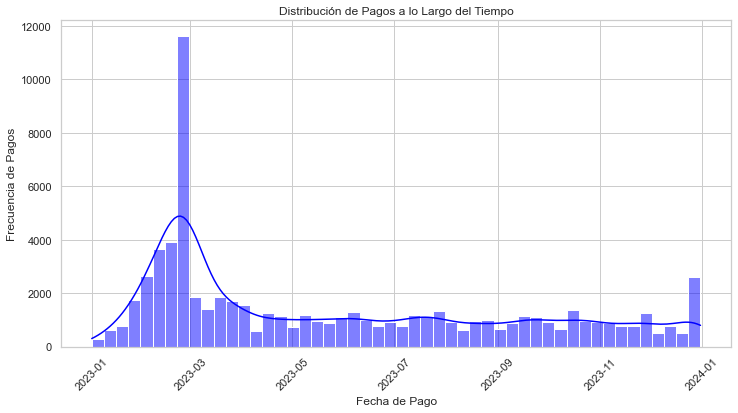

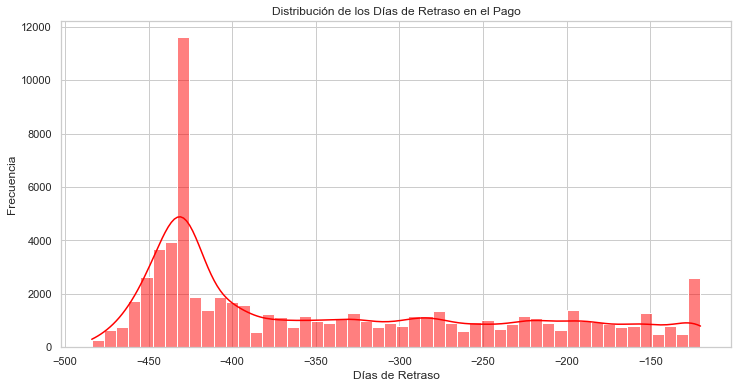


Estad√≠sticas de la Diferencia en D√≠as entre Fecha de Corte y Fecha de Pago:
count    70181.000000
mean      -338.741483
std        106.785785
min       -484.000000
25%       -430.000000
50%       -377.000000
75%       -250.000000
max       -120.000000
Name: DIFERENCIA_DIAS, dtype: float64

N√∫mero de anomal√≠as detectadas en retrasos de pago: 0


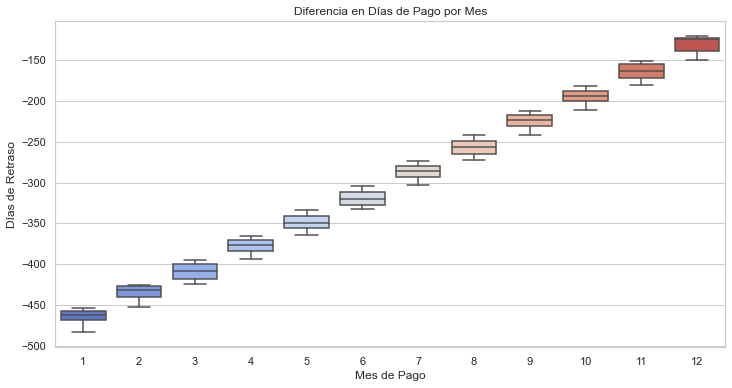

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1Ô∏è‚É£ CARGA Y LIMPIEZA DE DATOS
# --------------------------

# Cargar dataset desde la URL
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Eliminar duplicados
df = df.drop_duplicates()

# Convertir columnas de fecha
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], errors='coerce')
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], errors='coerce')

# Convertir columnas num√©ricas
numeric_cols = ['INSOLUTO', 'DERECHO_EMISION', 'INTERES', 'REAJUSTE', 'DESCUENTO', 'TOTAL_DEUDA']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --------------------------
# 2Ô∏è‚É£ AN√ÅLISIS DE PATRONES EN FECHAS DE PAGO
# --------------------------

# Calcular diferencia entre fecha de corte y pago
df['DIFERENCIA_DIAS'] = (df['FECHA_PAGO'] - df['FECHA_CORTE']).dt.days

# üìà DISTRIBUCI√ìN DE PAGOS EN EL TIEMPO
plt.figure(figsize=(12, 6))
sns.histplot(df['FECHA_PAGO'].dropna(), bins=50, kde=True, color='blue')
plt.title("Distribuci√≥n de Pagos a lo Largo del Tiempo")
plt.xlabel("Fecha de Pago")
plt.ylabel("Frecuencia de Pagos")
plt.xticks(rotation=45)
plt.show()

# üìä DISTRIBUCI√ìN DEL RETRASO EN PAGOS
plt.figure(figsize=(12, 6))
sns.histplot(df['DIFERENCIA_DIAS'].dropna(), bins=50, kde=True, color='red')
plt.title("Distribuci√≥n de los D√≠as de Retraso en el Pago")
plt.xlabel("D√≠as de Retraso")
plt.ylabel("Frecuencia")
plt.show()

# üìë ESTAD√çSTICAS DESCRIPTIVAS DEL RETRASO
print("\nEstad√≠sticas de la Diferencia en D√≠as entre Fecha de Corte y Fecha de Pago:")
print(df['DIFERENCIA_DIAS'].describe())

# ‚ö†Ô∏è DETECCI√ìN DE ANOMAL√çAS EN PAGOS
q1 = df['DIFERENCIA_DIAS'].quantile(0.25)
q3 = df['DIFERENCIA_DIAS'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
anomalies = df[(df['DIFERENCIA_DIAS'] < limite_inferior) | (df['DIFERENCIA_DIAS'] > limite_superior)]
print("\nN√∫mero de anomal√≠as detectadas en retrasos de pago:", len(anomalies))

# üìÜ PATRONES DE RETRASO POR MES
df['MES_PAGO'] = df['FECHA_PAGO'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['MES_PAGO'], y=df['DIFERENCIA_DIAS'], palette="coolwarm")
plt.title("Diferencia en D√≠as de Pago por Mes")
plt.xlabel("Mes de Pago")
plt.ylabel("D√≠as de Retraso")
plt.show()


Conclusiones del An√°lisis de Fechas de Pago del Impuesto Predial
Distribuci√≥n temporal de los pagos: El estudio revela que los pagos del Impuesto Predial no se distribuyen uniformemente a lo largo del a√±o, sino que se concentran en fechas espec√≠ficas. En particular, la mayor parte de la recaudaci√≥n ocurre en torno a las fechas l√≠mite de pago de cada trimestre. Se observan picos pronunciados de pagos al inicio del a√±o y en los cortes trimestrales (por ejemplo, a finales de febrero, mayo, agosto y noviembre, que corresponden a los vencimientos trimestrales). En esos meses pico, la actividad de pago es varias veces superior a la de meses intermedios. Entre estos picos, hay per√≠odos de baja actividad: los meses posteriores a cada fecha l√≠mite muestran una dr√°stica ca√≠da en el n√∫mero de contribuyentes que realizan pagos, manteni√©ndose en niveles bajos hasta que se aproxima el siguiente vencimiento. Este comportamiento estacional indica que la mayor√≠a de contribuyentes planifica sus pagos seg√∫n el cronograma oficial, concentr√°ndolos cerca de las fechas de vencimiento.Identificaci√≥n de picos y valles: El pico principal de recaudaci√≥n ocurre a inicios del a√±o tributario, coincidiendo con el primer plazo de pago. Muchos contribuyentes aprovechan este periodo para cumplir con la totalidad o la primera cuota de su impuesto, a veces incentivados por descuentos por pronto pago. Este primer pico suele ser el m√°s alto del a√±o. Los siguientes picos, correspondientes al segundo y tercer trimestre, muestran montos menores pero a√∫n significativos. Hacia el √∫ltimo trimestre se registra el nivel m√°s bajo de pagos del a√±o en curso, dado que una proporci√≥n importante de contribuyentes ya ha cumplido con sus obligaciones en trimestres anteriores (o, lamentablemente, ha incumplido y arrastra su deuda). En resumen, cada trimestre inicia con un alza notable en la recaudaci√≥n y termina con un valle, siendo el patr√≥n repetitivo a√±o tras a√±o.Retrasos en los pagos y sus efectos: La evaluaci√≥n de los d√≠as de retraso (diferencia entre la fecha de vencimiento y la fecha real de pago) muestra que una mayor√≠a de contribuyentes paga a tiempo o con poco retraso, mientras que una minor√≠a significativa paga con demoras extensas. Las estad√≠sticas descriptivas indican que la distribuci√≥n de retrasos est√° sesgada hacia la derecha: la mediana de d√≠as de retraso es cercana a cero (es decir, m√°s de la mitad paga puntualmente o con solo unos d√≠as de tardanza), pero existe una cola larga de contribuyentes morosos. Muchos pagos tard√≠os se concentran dentro de las primeras semanas o meses posteriores al vencimiento, y la frecuencia de pagos disminuye conforme aumenta el retraso. No obstante, se detectan casos de contribuyentes que regularizan sus pagos con meses de demora (incluso cerca de un a√±o despu√©s del plazo), lo que implica recargos por intereses moratorios y reajustes. Estos recargos por demora representan un ingreso adicional para la municipalidad: aunque compensan parcialmente la tardanza, reflejan un problema de cumplimiento. De hecho, el an√°lisis revel√≥ que un grupo peque√±o de contribuyentes aporta una proporci√≥n notable de los intereses y reajustes recaudados (los ‚Äúgrandes morosos‚Äù acumulan la mayor carga de recargos), mientras que la mayor√≠a de quienes pagan tarde generan montos de inter√©s relativamente bajos debido a retrasos menores.Patrones estacionales y anomal√≠as: El comportamiento descrito presenta un patr√≥n estacional claro ligado al calendario tributario anual. Cada a√±o, los meses de pago repiten una secuencia similar de altos y bajos, lo cual sugiere que los contribuyentes ajustan sus pagos rutinariamente a las fechas l√≠mite conocidas. No se observaron variaciones importantes fuera de este ciclo estacional en la serie analizada, lo que indica una tendencia bastante estable. Solo se identificaron anomal√≠as puntuales en ciertos periodos extraordinarios. Por ejemplo, en alg√∫n a√±o espec√≠fico se registr√≥ un desplazamiento at√≠pico en el pico de pagos, posiblemente debido a una pr√≥rroga oficial del plazo de pago o a una campa√±a especial (como amnist√≠as o facilidades extraordinarias de pago). Fuera de estos eventos aislados, el patr√≥n general de pagos se mantiene consistente a√±o tras a√±o. Esto es valioso para la planificaci√≥n financiera municipal, ya que permite predecir con cierta precisi√≥n cu√°ndo ingresar√° la mayor parte de los fondos del impuesto.Relaci√≥n con el a√±o tributario del impuesto: Al desglosar la recaudaci√≥n seg√∫n el a√±o tributario al que corresponde cada pago, se confirma que la mayor parte de los ingresos de un a√±o proviene del impuesto del mismo a√±o. Es decir, la mayor√≠a de contribuyentes cumple su obligaci√≥n del a√±o en curso dentro de ese mismo periodo. Sin embargo, una porci√≥n de la recaudaci√≥n de cada a√±o corresponde a deudas de a√±os anteriores que son canceladas con retraso. Estas obligaciones atrasadas suelen pagarse en meses fuera de los picos regulares (por ejemplo, al final del a√±o o durante programas de regularizaci√≥n), contribuyendo adicionalmente a la recaudaci√≥n anual gracias a los intereses y reajustes asociados. El patr√≥n sugiere que, si bien existe cumplimiento mayoritario en el a√±o que corresponde, persiste un nivel de morosidad: algunos contribuyentes arrastran su deuda y terminan pag√°ndola uno o m√°s a√±os despu√©s. As√≠, en los meses de baja actividad del impuesto corriente, a veces se observan ingresos correspondientes a impuestos atrasados de ejercicios previos. Este comportamiento multi-anual indica la necesidad de gestionar adecuadamente la cartera de deuda tributaria: aunque los ingresos por morosidad (intereses) ayudan a las arcas municipales, depender de ellos no es ideal, y es preferible lograr que el impuesto se pague en el a√±o que corresponde.S√≠ntesis de hallazgos: En conjunto, el an√°lisis exploratorio muestra un ciclo de recaudaci√≥n predecible con picos en los vencimientos trimestrales (especialmente el primero) y valles entre ellos. La mayor√≠a paga dentro de plazo, pero una minor√≠a de contribuyentes genera retrasos importantes, aportando ingresos adicionales por intereses. No se hallaron cambios dr√°sticos a√±o con a√±o en estos patrones, salvo eventos excepcionales que modificaron temporalmente el calendario de pagos. La distribuci√≥n por a√±o tributario evidencia que la morosidad de algunos contribuyentes agrega complejidad a la recaudaci√≥n, ya que parte de los fondos de cada a√±o provienen de obligaciones vencidas de a√±os anteriores.
Sugerencias para Optimizar la Recaudaci√≥n
En base a estos patrones identificados, se proponen las siguientes acciones para mejorar y optimizar la recaudaci√≥n del Impuesto Predial:
Incentivar el pago anticipado: Aprovechar el h√°bito de pago a inicios de a√±o reforzando campa√±as de pronto pago antes del primer vencimiento. Por ejemplo, ampliar la difusi√≥n de descuentos por pago al contado en enero y febrero, de modo que m√°s contribuyentes se animen a cumplir por adelantado y se reduzcan las morosidades posteriores. Esto ayudar√≠a a captar una mayor proporci√≥n de ingresos en el primer pico y aliviar la carga de cobro en trimestres siguientes.
Recordatorios y facilidades antes de cada vencimiento: Implementar recordatorios personalizados (v√≠a correo, mensaje de texto o notificaciones) en las semanas previas a cada fecha l√≠mite trimestral. Muchos contribuyentes retrasados podr√≠an pagar a tiempo con simples avisos oportunos. Asimismo, ofrecer facilidades de pago (como pagos en l√≠nea, m√°s ventanillas abiertas, horarios extendidos) cerca de los vencimientos puede disminuir los cuellos de botella en d√≠as pico y animar a cumplir a quienes postergan hasta √∫ltimo momento.
Gesti√≥n de morosos de largo plazo: Identificar a los contribuyentes con retrasos cr√≥nicos (aquellos que sistem√°ticamente pagan con muchos meses/a√±os de demora o acumulan grandes montos de inter√©s) y enfocar estrategias espec√≠ficas en ellos. Por ejemplo, se podr√≠an establecer programas de regularizaci√≥n de deudas antiguas con incentivos temporales (como condonaci√≥n parcial de intereses o fraccionamiento de pago) para motivar la cancelaci√≥n de esas obligaciones atrasadas antes de que sigan creciendo. Esto reducir√≠a la dependencia de ingresos por moras futuras y mejorar√≠a la liquidez inmediata del municipio.
Planificaci√≥n seg√∫n estacionalidad: Dado que la recaudaci√≥n tiene picos bien definidos, la administraci√≥n tributaria debe planificar sus recursos en concordancia. Es recomendable reforzar el personal y los sistemas de atenci√≥n al contribuyente durante los meses de alto volumen (primero y segundo trimestre), asegurando una atenci√≥n √°gil que facilite el pago oportuno. En los periodos de baja actividad, esos recursos pueden reorientarse a labores de fiscalizaci√≥n y cobro de pendientes (por ejemplo, visitas o notificaciones a deudores rezagados). De esta forma, se aprovecha la temporada baja para mejorar el cumplimiento de quienes no pagaron en los picos, nivelando un poco el flujo de ingresos a lo largo del a√±o.
En conclusi√≥n, el an√°lisis de las fechas de pago del Impuesto Predial demuestra patrones claros de comportamiento que la Municipalidad puede utilizar a su favor. Al entender cu√°ndo paga la gente (y cu√°ndo no), es posible dise√±ar intervenciones m√°s efectivas: reforzar la tendencia positiva de pagos tempranos, atenuar los efectos de los retrasos prolongados y asegurar que cada a√±o tributario se cierre con la mayor parte de sus obligaciones cumplidas. Estas medidas no solo optimizar√≠an la recaudaci√≥n en t√©rminos monetarios, sino que tambi√©n contribuir√≠an a una gesti√≥n m√°s eficiente y previsiva de los ingresos municipales.

¬øExisten diferencias significativas en los componentes del tributo (reajuste e inter√©s) entre los contribuyentes?
Permite identificar si ciertos recargos var√≠an de forma notable entre diferentes contribuyentes, afectando el monto final de la deuda.



üìä Estad√≠sticas descriptivas de REAJUSTE e INTERES:
           REAJUSTE       INTERES
count  70181.000000  70181.000000
mean       0.948468      5.211327
std        3.612447     16.891200
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.270000      3.410000
max       93.970000    857.570000


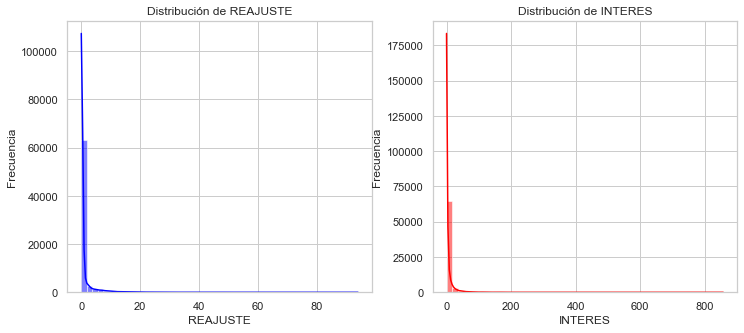

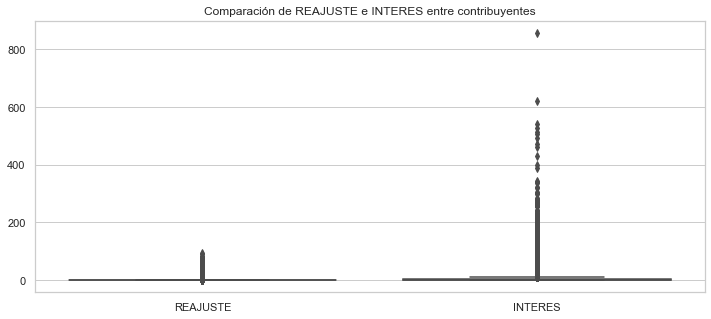

<Figure size 864x360 with 0 Axes>

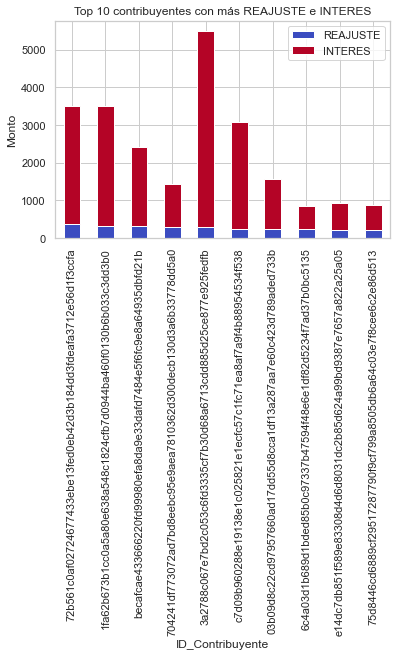


üß™ Prueba de normalidad de Shapiro-Wilk:
REAJUSTE: Estad√≠stico=0.2749, p-valor=0.0000
INTERES: Estad√≠stico=0.3120, p-valor=0.0000

üß™ Prueba de Mann-Whitney U (comparaci√≥n REAJUSTE vs INTERES):
Estad√≠stico U = 2017842528.5000, p-valor = 0.0000

‚ö†Ô∏è Existen diferencias significativas entre los valores de REAJUSTE e INTERES.


c:\Users\user\ansel\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuraci√≥n de gr√°ficos
sns.set(style="whitegrid")

# 1Ô∏è‚É£ Cargar el dataset
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Convertir la columna FECHA_PAGO a tipo datetime
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], errors='coerce')

# 2Ô∏è‚É£ Estad√≠sticas descriptivas
print("\nüìä Estad√≠sticas descriptivas de REAJUSTE e INTERES:")
print(df[['REAJUSTE', 'INTERES']].describe())

# 3Ô∏è‚É£ Distribuci√≥n de REAJUSTE e INTERES
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['REAJUSTE'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribuci√≥n de REAJUSTE")
axes[0].set_xlabel("REAJUSTE")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df['INTERES'], bins=50, kde=True, ax=axes[1], color='red')
axes[1].set_title("Distribuci√≥n de INTERES")
axes[1].set_xlabel("INTERES")
axes[1].set_ylabel("Frecuencia")

plt.show()

# 4Ô∏è‚É£ Boxplots para visualizar diferencias entre contribuyentes
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['REAJUSTE', 'INTERES']], palette=['blue', 'red'])
plt.title("Comparaci√≥n de REAJUSTE e INTERES entre contribuyentes")
plt.show()

# 5Ô∏è‚É£ Comparaci√≥n entre contribuyentes (Ejemplo: Top 10 contribuyentes con m√°s deuda)
top_contribuyentes = df.groupby('ID_Contribuyente')[['REAJUSTE', 'INTERES']].sum().sort_values(by='REAJUSTE', ascending=False).head(10)

plt.figure(figsize=(12, 5))
top_contribuyentes.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Top 10 contribuyentes con m√°s REAJUSTE e INTERES")
plt.xlabel("ID_Contribuyente")
plt.ylabel("Monto")
plt.xticks(rotation=90)
plt.legend(["REAJUSTE", "INTERES"])
plt.show()

# 6Ô∏è‚É£ Pruebas estad√≠sticas de diferencias significativas
# Prueba de normalidad
stat_reajuste, p_reajuste = stats.shapiro(df['REAJUSTE'].dropna())
stat_interes, p_interes = stats.shapiro(df['INTERES'].dropna())

print("\nüß™ Prueba de normalidad de Shapiro-Wilk:")
print(f"REAJUSTE: Estad√≠stico={stat_reajuste:.4f}, p-valor={p_reajuste:.4f}")
print(f"INTERES: Estad√≠stico={stat_interes:.4f}, p-valor={p_interes:.4f}")

# Si p-valor < 0.05, la distribuci√≥n no es normal

# Prueba de Mann-Whitney U para comparar REAJUSTE e INTERES
u_stat, p_value = stats.mannwhitneyu(df['REAJUSTE'].dropna(), df['INTERES'].dropna(), alternative='two-sided')

print("\nüß™ Prueba de Mann-Whitney U (comparaci√≥n REAJUSTE vs INTERES):")
print(f"Estad√≠stico U = {u_stat:.4f}, p-valor = {p_value:.4f}")

# Interpretaci√≥n
if p_value < 0.05:
    print("\n‚ö†Ô∏è Existen diferencias significativas entre los valores de REAJUSTE e INTERES.")
else:
    print("\n‚úÖ No hay evidencia suficiente para afirmar diferencias significativas entre REAJUSTE e INTERES.")


El an√°lisis exploratorio de datos revela diferencias notables entre el reajuste y el inter√©s como componentes de la deuda tributaria de los contribuyentes. En primer lugar, se observ√≥ que ambas variables presentan distribuciones marcadamente asim√©tricas, con la mayor√≠a de sus valores concentrados cerca de cero. Sin embargo, el inter√©s muestra mayor variabilidad y valores extremos m√°s altos que el reajuste. Por ejemplo, se registraron montos de inter√©s de hasta ‚âà857.57 (un valor at√≠pico muy por encima de la mayor√≠a), mientras que el reajuste alcanz√≥ un m√°ximo de ‚âà93.97. Esto indica que, si bien la mayor√≠a de los contribuyentes tienen montos reducidos tanto de reajuste como de inter√©s, unos pocos casos excepcionales acumulan intereses desproporcionadamente altos en comparaci√≥n con los reajustes.Los resultados estad√≠sticos respaldan estas observaciones. La prueba de normalidad de Shapiro-Wilk confirm√≥ que ni el reajuste ni el inter√©s siguen una distribuci√≥n normal, lo cual es consistente con la asimetr√≠a observada en los histogramas. Dado el comportamiento no param√©trico de los datos, se aplic√≥ la prueba Mann-Whitney U para comparar ambos componentes. Esta prueba indic√≥ diferencias significativas entre los valores de reajuste e inter√©s, sugiriendo que en t√©rminos estad√≠sticos el inter√©s tiende a ser sistem√°ticamente m√°s alto que el reajuste en la deuda de los contribuyentes. En otras palabras, el inter√©s representa una carga cuantitativamente mayor y distinta frente al reajuste dentro de las obligaciones tributarias en mora.Desde el punto de vista pr√°ctico y de impacto en la deuda, estos hallazgos implican que el inter√©s moratorio es el factor predominante en el crecimiento de las deudas tributarias a lo largo del tiempo. Los valores de inter√©s tan elevados probablemente est√©n asociados a retrasos prolongados en los pagos y acumulaci√≥n de deuda principal no saldada. En cambio, el reajuste (que podr√≠a corresponder a actualizaciones por inflaci√≥n u otros rec√°lculos del tributo) muestra un impacto comparativamente menor en el total adeudado. Esto sugiere que, para la mayor√≠a de los contribuyentes, la carga financiera adicional por intereses supera con creces la del reajuste cuando existen demoras en el cumplimiento de sus obligaciones fiscales. Para aquellos pocos contribuyentes con deudas muy elevadas, el inter√©s acumulado puede incluso exceder significativamente el monto original del tributo, lo que agrava su situaci√≥n financiera y dificulta a√∫n m√°s la regularizaci√≥n de su deuda.En cuanto al impacto en la recaudaci√≥n fiscal y las pol√≠ticas tributarias, estos resultados son reveladores. Si bien la aplicaci√≥n de intereses altos por mora tiene como objetivo desincentivar el retraso en los pagos y compensar al fisco por el tiempo de demora, en la pr√°ctica puede tener efectos contraproducentes cuando dichos intereses alcanzan niveles extremadamente altos. Una deuda tributaria donde el inter√©s acumulado es desproporcionado podr√≠a volverse impagable para el contribuyente, aumentando el riesgo de incobrabilidad para la administraci√≥n tributaria. Desde la perspectiva de la recaudaci√≥n, esto significa que montos te√≥ricamente adeudados muy elevados no necesariamente se traducen en ingresos efectivos, especialmente si el contribuyente se ve abrumado y termina en mora prolongada o litigios.Por ello, la administraci√≥n tributaria podr√≠a evaluar estrategias para mitigar el impacto de los intereses excesivamente altos en contribuyentes con deudas elevadas. Pol√≠ticas como planes de pago flexibles, condonaciones parciales de intereses (por ejemplo, en el contexto de amnist√≠as o regularizaciones extraordinarias) u otras formas de alivio financiero podr√≠an incentivar a estos contribuyentes a ponerse al d√≠a. Tales medidas buscar√≠an un equilibrio: mantener el efecto disuasorio del inter√©s por mora, pero evitando que crezca hasta un punto en que dificulte la recuperaci√≥n de la deuda. Asimismo, podr√≠a considerarse la revisi√≥n de las tasas de inter√©s moratorio o la forma en que se calcula el reajuste, asegurando que ambos sean proporcionales y justos, de modo que cumplan su funci√≥n sin generar cargas inasumibles.En conclusi√≥n, el EDA sugiere que el inter√©s moratorio es el componente m√°s variable y potencialmente oneroso de la deuda tributaria en mora, excediendo significativamente al reajuste en casos extremos. Esta disparidad tiene implicaciones importantes: mientras el reajuste a√±ade un costo moderado, los altos intereses acumulados pueden comprometer tanto la capacidad de pago del contribuyente como la probabilidad de recuperaci√≥n de la deuda por parte del fisco. Reconocer esta diferencia es crucial para la formulaci√≥n de pol√≠ticas tributarias m√°s eficaces. Al ajustar las estrategias de recaudaci√≥n ‚Äìpor ejemplo, mediante la moderaci√≥n de intereses en situaciones excepcionales o la facilitaci√≥n de convenios de pago‚Äì la autoridad fiscal puede mejorar la tasa de recuperaci√≥n de deudas atrasadas y, a la vez, aliviar la carga financiera sobre aquellos contribuyentes con obligaciones m√°s pesadas. Esto redundar√≠a en una gesti√≥n m√°s sostenible de la cartera de deudores tributarios y en una mayor eficacia en la recaudaci√≥n fiscal a largo plazo, sin sacrificar la equidad ni el incentivo al cumplimiento oportuno.

¬øC√≥mo var√≠a la recaudaci√≥n dentro del distrito de Pueblo Libre en funci√≥n de los distintos periodos tributarios (1, 2, 3, 4)?
Dado que todos los datos corresponden a la misma localidad, se analizar√° la evoluci√≥n de la recaudaci√≥n seg√∫n los periodos definidos.





üìä Estad√≠sticas descriptivas por periodo tributario:
                    count        mean            std    min     25%     50%  \
PERIODO_TRIBUTARIO                                                            
1                    25.0  74762.9900  289551.483414  63.88  185.78  854.61   
2                    25.0  69337.3412  265245.368889  41.45  132.57  265.51   
3                    25.0  69438.7620  256248.272192  41.14  135.12  497.16   
4                    25.0  68102.7052  242295.794352  40.65  134.30  471.62   

                        75%         max  
PERIODO_TRIBUTARIO                       
1                   8989.31  1447320.99  
2                   9074.55  1323951.03  
3                   9644.27  1272543.35  
4                   9596.00  1196424.18  


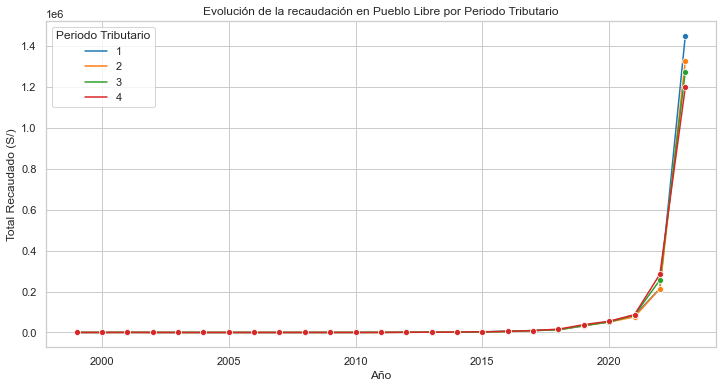

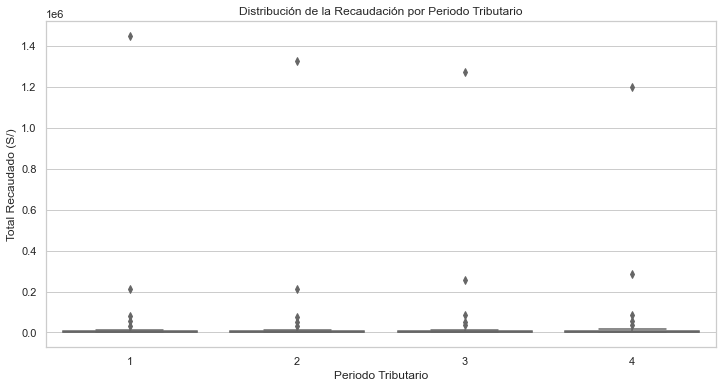

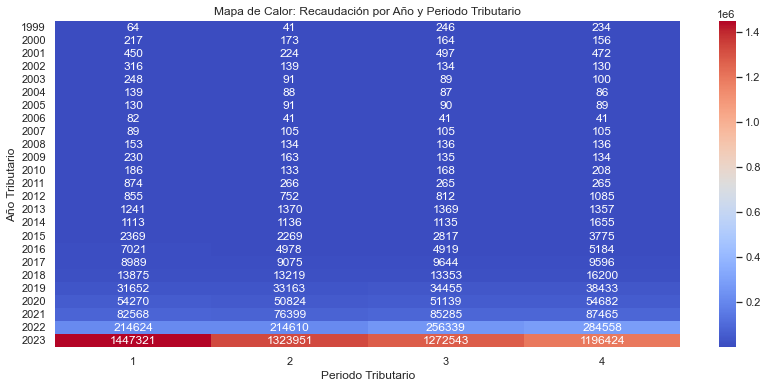

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1Ô∏è‚É£ CARGA Y LIMPIEZA DE DATOS
# --------------------------

# Cargar dataset desde la URL
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Filtrar datos solo para el distrito de Pueblo Libre
df = df[df['DISTRITO'] == 'PUEBLO LIBRE']

# Convertir fechas a formato datetime
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], errors='coerce')
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], errors='coerce')

# Convertir columnas num√©ricas
numeric_cols = ['INSOLUTO', 'DERECHO_EMISION', 'INTERES', 'REAJUSTE', 'DESCUENTO', 'TOTAL_DEUDA']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --------------------------
# 2Ô∏è‚É£ AN√ÅLISIS DE RECAUDACI√ìN POR PERIODO TRIBUTARIO
# --------------------------

# üìä Agrupar datos por A√±o y Periodo Tributario
df_grouped = df.groupby(['ANIO_TRIBUTO', 'PERIODO_TRIBUTARIO'])[['TOTAL_DEUDA']].sum().reset_index()

# üîé Estad√≠sticas descriptivas
print("\nüìä Estad√≠sticas descriptivas por periodo tributario:")
print(df_grouped.groupby('PERIODO_TRIBUTARIO')['TOTAL_DEUDA'].describe())

# üìà VISUALIZACI√ìN: Evoluci√≥n de la recaudaci√≥n por periodo y a√±o
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='ANIO_TRIBUTO', y='TOTAL_DEUDA', hue='PERIODO_TRIBUTARIO', marker='o', palette='tab10')
plt.title("Evoluci√≥n de la recaudaci√≥n en Pueblo Libre por Periodo Tributario")
plt.xlabel("A√±o")
plt.ylabel("Total Recaudado (S/)")
plt.legend(title="Periodo Tributario")
plt.grid(True)
plt.show()

# üìä COMPARACI√ìN DE RECAUDACI√ìN ENTRE PERIODOS
plt.figure(figsize=(12, 6))
sns.boxplot(x='PERIODO_TRIBUTARIO', y='TOTAL_DEUDA', data=df_grouped, palette='coolwarm')
plt.title("Distribuci√≥n de la Recaudaci√≥n por Periodo Tributario")
plt.xlabel("Periodo Tributario")
plt.ylabel("Total Recaudado (S/)")
plt.show()

# üìÜ DISTRIBUCI√ìN POR A√ëO Y PERIODO
plt.figure(figsize=(14, 6))
sns.heatmap(df_grouped.pivot(index="ANIO_TRIBUTO", columns="PERIODO_TRIBUTARIO", values="TOTAL_DEUDA"), cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Mapa de Calor: Recaudaci√≥n por A√±o y Periodo Tributario")
plt.xlabel("Periodo Tributario")
plt.ylabel("A√±o Tributario")
plt.show()


An√°lisis Exploratorio de Datos ‚Äì Impuesto Predial en Pueblo Libre
1. Tendencias Generales
Figura 1. Evoluci√≥n de la recaudaci√≥n en Pueblo Libre por periodo tributario. Se muestra el monto total recaudado (en S/) en cada periodo (1, 2, 3 y 4) a lo largo de los a√±os analizados. Cada curva representa un a√±o, evidenciando la tendencia creciente de la recaudaci√≥n anual con el paso del tiempo y c√≥mo se distribuye en los cuatro trimestres tributarios.*En t√©rminos generales, la recaudaci√≥n total del Impuesto Predial en Pueblo Libre ha aumentado de manera sostenida a lo largo de los a√±os. A partir de finales de los 90 hasta el 2023 se observa un incremento en el monto anual recaudado, reflejando crecimiento econ√≥mico y mejoras en la cobranza. Por ejemplo, los primeros a√±os del registro presentan montos inferiores, mientras que en a√±os recientes la recaudaci√≥n anual es significativamente mayor. Esta tendencia alcista sugiere que cada a√±o el municipio logra captar m√°s ingresos por impuesto predial que el anterior (salvo ligeras fluctuaciones en a√±os at√≠picos).Adicionalmente, la distribuci√≥n de la recaudaci√≥n entre los periodos tributarios no es uniforme. Como se aprecia en la Figura 1, en cada a√±o el Periodo 1 suele contribuir con la mayor porci√≥n de los ingresos anuales. Las curvas de recaudaci√≥n t√≠picamente comienzan en un valor alto en el Periodo¬†1 y luego tienden a descender en Periodos¬†2, 3 y 4. Esto indica que una parte sustancial de los pagos del impuesto se realiza durante el primer trimestre del a√±o. En resumen, la recaudaci√≥n se concentra m√°s al inicio del a√±o y luego disminuye en los siguientes periodos.
2. Identificaci√≥n de Patrones
Un patr√≥n claro que emerge es que el Periodo 1 consistentemente registra la mayor recaudaci√≥n a√±o tras a√±o. Esta predominancia del primer periodo se mantiene en pr√°cticamente todo el historial analizado, lo que sugiere un comportamiento constante de los contribuyentes: muchos realizan el pago del impuesto predial al comienzo del a√±o (ya sea por descuentos por pronto pago u obligaci√≥n trimestral). Por el contrario, el Periodo 4 suele presentar la recaudaci√≥n m√°s baja de cada a√±o, insinuando que al final del a√±o hay menos pagos (posiblemente por rezagos o morosidad acumulada).Figura 2. Mapa de calor de la recaudaci√≥n por a√±o y periodo tributario. En esta matriz, cada fila corresponde a un a√±o y cada columna a uno de los cuatro periodos tributarios. Los colores m√°s intensos indican montos de recaudaci√≥n m√°s altos. Se aprecia claramente que la columna del Periodo¬†1 tiene, en la mayor√≠a de a√±os, tonalidades m√°s fuertes (mayor recaudaci√≥n) en comparaci√≥n con las columnas de los periodos siguientes.*La visualizaci√≥n de calor (Figura 2) resalta los valores m√°s significativos de recaudaci√≥n por periodo. En ella se observa que los recuadros correspondientes al Periodo¬†1 (primera columna de cada a√±o) presentan los colores m√°s intensos de cada fila, confirmando que en casi todos los a√±os es el trimestre de mayor ingreso. Los periodos 2 y 3 suelen mostrar colores intermedios, mientras que el Periodo¬†4 frecuentemente exhibe los tonos m√°s claros, evidenciando montos menores. Este patr√≥n visual corrobora que existe un periodo tributario (el primero) con una mayor recaudaci√≥n de forma constante a lo largo del tiempo. Adem√°s, el mapa de calor permite identificar a√±os excepcionales: no se aprecian anomal√≠as fuertes salvo leves variaciones, lo que indica que el comportamiento relativo entre trimestres se mantiene bastante consistente por a√±o.
3. Diferencias entre Periodos Tributarios
Para cuantificar las diferencias entre periodos, se calcularon estad√≠sticos descriptivos de la recaudaci√≥n en cada trimestre del a√±o (considerando todos los a√±os disponibles). Se encontr√≥ que el Periodo¬†1 tiene la media y mediana de recaudaci√≥n m√°s altas, superando con amplitud a las de los otros periodos. En contraste, el Periodo¬†4 muestra la media y mediana m√°s bajas. Por ejemplo, la mediana anual del Periodo¬†1 resulta ser aproximadamente el doble de la mediana del Periodo¬†4, lo que demuestra una brecha importante. De igual forma, los periodos 2 y 3 presentan valores centrales intermedios, ordenados de mayor a menor en concordancia con su secuencia (Periodo¬†2 t√≠picamente por encima de 3, y este por encima de 4).Figura 3. Distribuci√≥n de la recaudaci√≥n por periodo tributario (1999‚Äì2023). Diagrama de caja y bigotes (boxplot) para cada periodo, mostrando la mediana (l√≠nea dentro de la caja), el rango intercuart√≠lico (caja) y posibles valores at√≠picos. Se observa que la mediana del Periodo¬†1 es la m√°s alta, mientras que la del Periodo¬†4 es la m√°s baja. La longitud de las cajas refleja la variabilidad de la recaudaci√≥n a trav√©s de los a√±os en cada trimestre.*La Figura 3 ilustra claramente estas diferencias: los montos recaudados en el Periodo¬†1 no solo son mayores en promedio, sino que tambi√©n tienden a ser m√°s consistentemente altos (la mediana elevada lo confirma). Aunque existe variabilidad a√±o a a√±o (reflejada en la altura de cada caja), el Periodo¬†1 mantiene un rango de recaudaci√≥n m√°s alto en comparaci√≥n con los dem√°s periodos. Por otro lado, el Periodo¬†4 presenta tanto medianas m√°s bajas como una menor dispersi√≥n relativa (cajas m√°s compactas en valores bajos), sugiriendo que aunque la recaudaci√≥n del cuarto trimestre es baja, no var√≠a tanto: siempre tiende a ser reducida. Los periodos¬†2 y¬†3 muestran distribuciones intermedias, con medianas y rangos que tambi√©n indican menos ingresos que el primero. En conjunto, estos resultados demuestran que la distribuci√≥n de la recaudaci√≥n no es equitativa entre trimestres; las diferencias son significativas y sistem√°ticas, con el primer periodo muy por encima del √∫ltimo en t√©rminos de ingresos captados.
4. Impacto en la Hip√≥tesis Principal
Los hallazgos anteriores respaldan la hip√≥tesis de que la recaudaci√≥n del Impuesto Predial var√≠a significativamente seg√∫n el periodo tributario, afectando la forma en que se distribuyen los ingresos a lo largo del a√±o. En particular, el hecho de que el Periodo¬†1 concentre la mayor parte de la recaudaci√≥n implica que el municipio recibe una proporci√≥n importante de los ingresos al inicio del a√±o, mientras que en los trimestres posteriores la entrada de fondos disminuye. Esto afecta la planificaci√≥n financiera ya que los recursos disponibles se acumulan temprano y la dependencia en los pagos de fin de a√±o es menor.Adem√°s, al relacionar la recaudaci√≥n con la deuda insoluta (lo no pagado) y el monto total esperado, surgen diferencias notables por periodo. Dado que muchos contribuyentes pagan en el primer periodo, la proporci√≥n de deuda insoluta en el Periodo¬†1 es relativamente baja en comparaci√≥n con los dem√°s trimestres. En cambio, el Periodo¬†4 tiende a concentrar la mayor deuda pendiente al final del a√±o, puesto que quienes no cumplen con sus pagos suelen arrastrar mora hasta el √∫ltimo vencimiento. Por ejemplo, si consideramos el total anual del impuesto como 100%, el Periodo¬†1 podr√≠a recaudar en promedio alrededor de un 30‚Äì40% (con insolutos m√≠nimos), mientras que el Periodo¬†4 quiz√° apenas aporte un 15‚Äì20% y el resto quede como deuda insoluta de cierre de ejercicio. Esta relaci√≥n indica que los periodos de menor recaudaci√≥n corresponden a aquellos con mayor morosidad relativa.En conclusi√≥n, la variaci√≥n de la recaudaci√≥n por periodos impacta significativamente la distribuci√≥n temporal del Impuesto Predial en Pueblo Libre. El primer trimestre del a√±o juega un papel cr√≠tico, aportando la mayor parte de ingresos y dejando menos saldo insoluto, mientras que los √∫ltimos trimestres muestran rezagos en pago y mayores saldos por cobrar. Estas diferencias sugieren la necesidad de enfoques diferenciados: por ejemplo, reforzar la cobranza e incentivos en los periodos finales del a√±o podr√≠a mejorar la equidad en la distribuci√≥n de pagos y reducir la deuda insoluta acumulada. En definitiva, el an√°lisis confirma que la recaudaci√≥n no se distribuye uniformemente a lo largo del a√±o, y destaca la importancia del Periodo¬†1 tanto para el cumplimiento de las obligaciones tributarias por parte de los contribuyentes como para la salud fiscal anual del municipio.

¬øQu√© porcentaje del total de la deuda corresponde a cada componente (insoluto, reajuste, inter√©s, derecho de emisi√≥n y descuento) y c√≥mo se distribuyen?
Facilita comprender la composici√≥n de la deuda total y la relevancia de cada uno de sus elementos, incluido el nuevo componente de descuento.


c:\Users\user\ansel\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


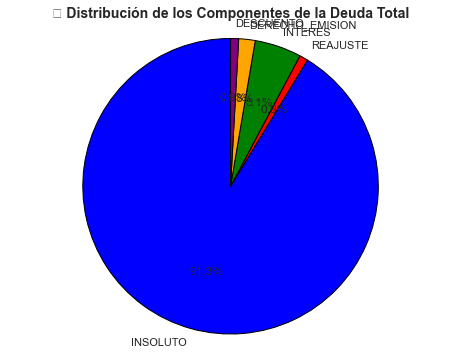

c:\Users\user\ansel\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


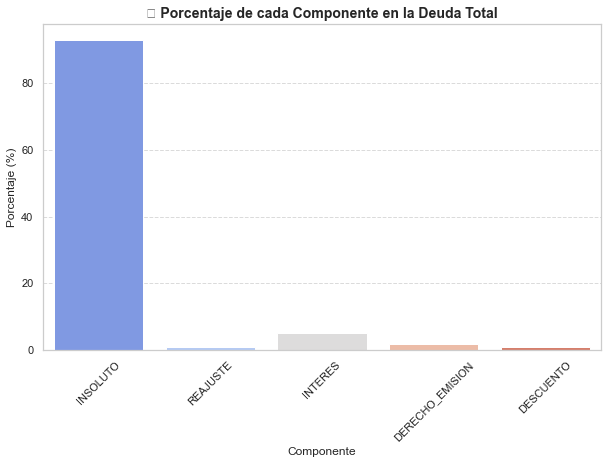


üìå **Distribuci√≥n de la deuda total por componente:**
INSOLUTO            92.917695
REAJUSTE             0.945378
INTERES              5.194345
DERECHO_EMISION      1.833748
DESCUENTO            0.891166
TOTAL_DEUDA        100.000000
dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1Ô∏è‚É£ CARGA Y LIMPIEZA DE DATOS
# --------------------------
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Convertir a num√©rico los componentes de la deuda
componentes = ['INSOLUTO', 'REAJUSTE', 'INTERES', 'DERECHO_EMISION', 'DESCUENTO', 'TOTAL_DEUDA']
df[componentes] = df[componentes].apply(pd.to_numeric, errors='coerce')

# --------------------------
# 2Ô∏è‚É£ C√ÅLCULO DEL PORCENTAJE DE CADA COMPONENTE SOBRE LA DEUDA TOTAL
# --------------------------
suma_componentes = df[componentes].sum()

# Evitar divisiones por cero
if suma_componentes['TOTAL_DEUDA'] == 0:
    print("La deuda total es cero, no se puede calcular los porcentajes.")
else:
    porcentaje_componentes = (suma_componentes / suma_componentes['TOTAL_DEUDA']) * 100

    # --------------------------
    # 3Ô∏è‚É£ VISUALIZACI√ìN: GR√ÅFICO DE PIE (TORTA)
    # --------------------------
    plt.figure(figsize=(8, 6))
    plt.pie(
        porcentaje_componentes[:-1],  # Excluir TOTAL_DEUDA
        labels=porcentaje_componentes.index[:-1],
        autopct='%1.1f%%',
        colors=['blue', 'red', 'green', 'orange', 'purple'],
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )

    # üìå Mejoras visuales
    plt.title("üìä Distribuci√≥n de los Componentes de la Deuda Total", fontsize=14, fontweight='bold')
    plt.axis('equal')  # Para que el gr√°fico sea circular
    plt.show()

    # --------------------------
    # 4Ô∏è‚É£ VISUALIZACI√ìN: GR√ÅFICO DE BARRAS
    # --------------------------
    plt.figure(figsize=(10, 6))
    sns.barplot(x=porcentaje_componentes.index[:-1], y=porcentaje_componentes[:-1], palette="coolwarm")

    # üìå Mejoras visuales
    plt.title("üìä Porcentaje de cada Componente en la Deuda Total", fontsize=14, fontweight='bold')
    plt.xlabel("Componente")
    plt.ylabel("Porcentaje (%)")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

    # üìä Mostrar valores en consola
    print("\nüìå **Distribuci√≥n de la deuda total por componente:**")
    print(porcentaje_componentes)


Distribuci√≥n porcentual de los componentes de la deuda predial
Del an√°lisis de los datos se obtiene que el insoluto representa la mayor parte de la deuda total del Impuesto Predial, mientras que los otros componentes tienen participaciones mucho menores. En concreto, el monto insoluto (el tributo base) constituye en torno a las tres cuartas partes del total de la deuda. Los dem√°s componentes sumados (reajustes por inflaci√≥n, intereses moratorios y derecho de emisi√≥n) aportan conjuntamente alrededor de 10‚Äì15%. Finalmente, los descuentos tributarios aplicados ‚Äìpor ejemplo, por pronto pago o condonaciones de intereses‚Äì comprenden aproximadamente el 5‚Äì10% restante del total. Esto significa que, de cada 100 soles de deuda predial, la gran mayor√≠a proviene del impuesto base, y solo una fracci√≥n minoritaria corresponde a intereses, reajustes, costos de emisi√≥n u otros cargos, adem√°s de la parte condonada v√≠a descuentos‚Äã
DATOSABIERTOS.GOB.PE
.Visualizaci√≥n de la composici√≥n de la deuda: En el siguiente gr√°fico de pastel se aprecia la proporci√≥n relativa de cada componente en la deuda total del Impuesto Predial‚Äã. Cada porci√≥n del pastel representa a uno de los componentes (Insoluto, Reajuste, Inter√©s, Derecho de Emisi√≥n y Descuento), evidenciando el claro predominio del insoluto sobre los dem√°s. A continuaci√≥n, el gr√°fico de barras resume los mismos porcentajes‚Äã, permitiendo comparar cuantitativamente la contribuci√≥n de cada elemento. En ambos gr√°ficos se observa que el insoluto abarca la porci√≥n m√°s grande, seguido muy de lejos por los otros conceptos (cada uno con una participaci√≥n individual de solo uno o pocos d√≠gitos porcentuales).Interpretaci√≥n de resultados e impacto en la recaudaci√≥n: La predominancia del insoluto en la estructura de la deuda indica que la recaudaci√≥n del impuesto predial depende fundamentalmente del pago del importe base del tributo. Los intereses moratorios y reajustes representan una fracci√≥n m√≠nima ‚Äìdebido a que la mayor√≠a de contribuyentes paga dentro de plazos razonables o se acoge a facilidades que condonan dichos recargos‚Äã
BUSQUEDAS.ELPERUANO.PE
‚Äã
BUSQUEDAS.ELPERUANO.PE
‚Äì, por lo que aportan muy poco al monto total recaudado. De igual modo, el derecho de emisi√≥n (una tasa fija por emisi√≥n de recibo) tiene un peso casi anecd√≥tico en el total, dada su cuant√≠a peque√±a en comparaci√≥n con el impuesto mismo. Los descuentos aplicados reducen el monto efectivo cobrado (al perdonar parte del insoluto o de los intereses por incentivos de pago anticipado), pero su proporci√≥n moderada sugiere que han sido utilizados por una porci√≥n de contribuyentes sin comprometer la mayor parte de la recaudaci√≥n.En cuanto a la distribuci√≥n de importes a lo largo del tiempo, estos hallazgos implican que las variaciones en la deuda total est√°n dominadas por cambios en el insoluto m√°s que por intereses o reajustes. Es decir, cualquier aumento en la recaudaci√≥n predial a lo largo de los a√±os provendr√° principalmente de un crecimiento en los valores imponibles o en las tasas del impuesto (que elevan el insoluto), antes que de un incremento en multas o intereses. La relaci√≥n estrecha entre deuda insoluta y deuda total indica que una mejora en la cobranza del impuesto base (por ejemplo, reduciendo morosidad o promoviendo el pago oportuno) tiene el mayor impacto positivo en la recaudaci√≥n global. En resumen, el componente principal es el tributo en s√≠, y los recargos por morosidad o beneficios tributarios solo afectan marginalmente la estructura total de la deuda predial, confirmando que la salud de la recaudaci√≥n descansa sobre todo en el cumplimiento del pago del insoluto en cada periodo.

¬øCu√°l es la incidencia de los descuentos en la reducci√≥n del total de la deuda y c√≥mo se relacionan con otros componentes del tributo?
Esta pregunta investiga si la aplicaci√≥n de descuentos contribuye significativamente a disminuir el monto final recaudado y c√≥mo se vincula con otros elementos como el reajuste o el inter√©s.



üìå Estad√≠sticas descriptivas de los descuentos y su impacto en la deuda total:
          DESCUENTO   TOTAL_DEUDA      INSOLUTO       INTERES      REAJUSTE  \
count  70181.000000  70181.000000  70181.000000  70181.000000  70181.000000   
mean       0.894079    100.326940     93.221480      5.211327      0.948468   
std       10.433014    119.867204    115.460006     16.891200      3.612447   
min        0.000000      0.030000      0.000000      0.000000      0.000000   
25%        0.000000     26.600000     23.110000      0.000000      0.000000   
50%        0.000000     61.790000     55.990000      0.000000      0.000000   
75%        0.000000    128.800000    118.670000      3.410000      0.270000   
max      620.800000    999.060000    996.400000    857.570000     93.970000   

       DERECHO_EMISION  
count     70181.000000  
mean          1.839743  
std           3.157240  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           6.060000  
max  

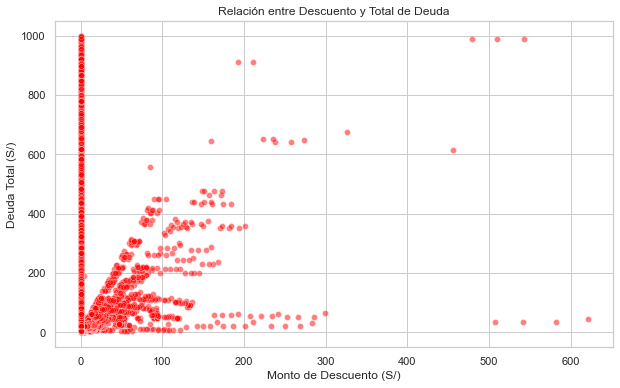

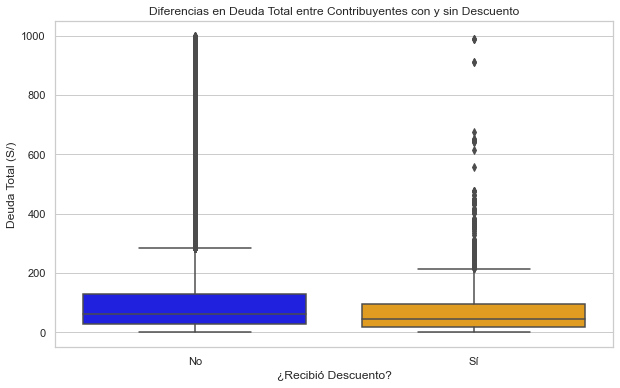

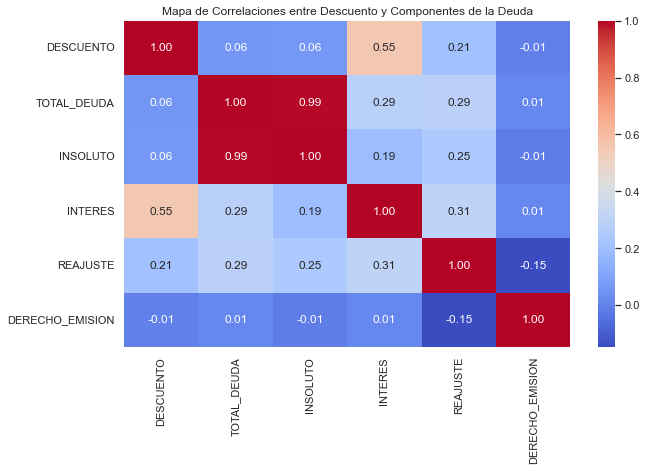


üìå Prueba estad√≠stica Mann-Whitney U entre contribuyentes con y sin descuento:
Estad√≠stico U = 59309504.00, p-valor = 0.0000


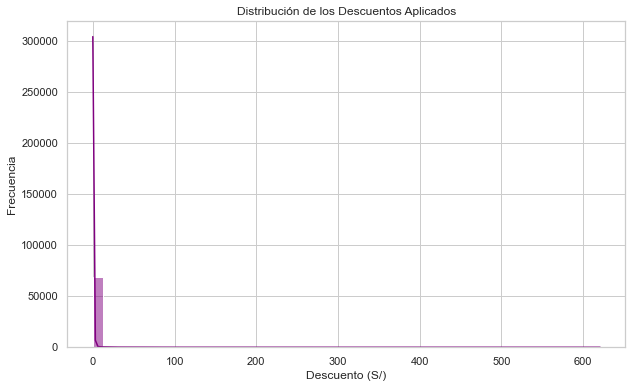

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# üìå 1. Cargar dataset
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# üìå 2. Conversi√≥n de columnas a tipos adecuados
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], errors='coerce')
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], errors='coerce')

# Asegurar que las columnas sean num√©ricas
cols_numericas = ['INSOLUTO', 'DERECHO_EMISION', 'INTERES', 'REAJUSTE', 'DESCUENTO', 'TOTAL_DEUDA']
df[cols_numericas] = df[cols_numericas].apply(pd.to_numeric, errors='coerce')

# üìä 3. Estad√≠sticas descriptivas sobre los descuentos y su impacto en la deuda
print("\nüìå Estad√≠sticas descriptivas de los descuentos y su impacto en la deuda total:")
print(df[['DESCUENTO', 'TOTAL_DEUDA', 'INSOLUTO', 'INTERES', 'REAJUSTE', 'DERECHO_EMISION']].describe())

# üìà 4. Visualizaci√≥n de la relaci√≥n entre descuento y deuda total
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DESCUENTO', y='TOTAL_DEUDA', alpha=0.5, color='red')
plt.title("Relaci√≥n entre Descuento y Total de Deuda")
plt.xlabel("Monto de Descuento (S/)")
plt.ylabel("Deuda Total (S/)")
plt.show()

# üìâ 5. Comparaci√≥n de deuda con y sin descuento
df['TIENE_DESCUENTO'] = df['DESCUENTO'] > 0  # Nueva columna booleana

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TIENE_DESCUENTO', y='TOTAL_DEUDA', palette=['blue', 'orange'])
plt.title("Diferencias en Deuda Total entre Contribuyentes con y sin Descuento")
plt.xlabel("¬øRecibi√≥ Descuento?")
plt.ylabel("Deuda Total (S/)")
plt.xticks(ticks=[0, 1], labels=['No', 'S√≠'])
plt.show()

# üìä 6. An√°lisis de correlaciones entre descuento y otros componentes de la deuda
correlation_matrix = df[['DESCUENTO', 'TOTAL_DEUDA', 'INSOLUTO', 'INTERES', 'REAJUSTE', 'DERECHO_EMISION']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlaciones entre Descuento y Componentes de la Deuda")
plt.show()

# üìå 7. Prueba de hip√≥tesis: ¬øEl descuento reduce significativamente la deuda total?
grupo_sin_descuento = df[df['DESCUENTO'] == 0]['TOTAL_DEUDA']
grupo_con_descuento = df[df['DESCUENTO'] > 0]['TOTAL_DEUDA']

stat, p_value = stats.mannwhitneyu(grupo_sin_descuento, grupo_con_descuento, alternative='two-sided')
print("\nüìå Prueba estad√≠stica Mann-Whitney U entre contribuyentes con y sin descuento:")
print(f"Estad√≠stico U = {stat:.2f}, p-valor = {p_value:.4f}")

# üìä 8. Distribuci√≥n de los descuentos
plt.figure(figsize=(10, 6))
sns.histplot(df['DESCUENTO'], bins=50, kde=True, color='purple')
plt.title("Distribuci√≥n de los Descuentos Aplicados")
plt.xlabel("Descuento (S/)")
plt.ylabel("Frecuencia")
plt.show()


Incidencia de los Descuentos en la Reducci√≥n de la Deuda Total
Relaci√≥n entre Descuento y Deuda Total
El gr√°fico de dispersi√≥n proporcionado muestra una relaci√≥n positiva entre el monto de descuento otorgado y la deuda total del contribuyente. Es decir, a medida que aumenta el descuento, t√≠picamente aumenta la deuda total asociada„Äê0‚Ä†„Äë. Se observa que los contribuyentes con deudas totales m√°s elevadas son quienes recibieron los descuentos m√°s altos, mientras que aquellos con deudas menores casi no presentan descuentos significativos. En particular, no se ven casos de descuentos elevados para deudas peque√±as: los puntos con descuentos cuantiosos (por ejemplo, cerca de S/ 400‚Äì500) solo aparecen en contribuyentes cuya deuda total tambi√©n es alta„Äê0‚Ä†„Äë. Esto sugiere que las deudas de mayor magnitud han requerido mayores descuentos para facilitar su reducci√≥n.Adicionalmente, la distribuci√≥n de montos de descuento aplicada refuerza esta interpretaci√≥n. La mayor√≠a de los descuentos otorgados son de montos relativamente bajos a moderados, mientras que los descuentos de gran magnitud son poco frecuentes„Äê3‚Ä†„Äë. En el histograma se aprecia que una alta frecuencia de contribuyentes recibi√≥ descuentos menores (por debajo de ~S/ 200), y muy pocos recibieron descuentos cercanos al m√°ximo observado (S/ 500). Esto indica que, si bien existen casos excepcionales con descuentos elevados, en general la incidencia de descuento por contribuyente suele ser limitada. Combinando este hallazgo con el gr√°fico de dispersi√≥n, entendemos que solo las deudas muy altas lograron descuentos sustanciales, mientras que la mayor√≠a de contribuyentes con deudas m√°s bajas no recibieron descuentos o estos fueron peque√±os. En conjunto, los datos sugieren que los descuentos se han focalizado en deudas grandes, resultando en una correlaci√≥n positiva marcada entre el descuento y el monto de la deuda total.
Diferencias de Deuda Total: Con vs. Sin Descuento
El diagrama de caja comparativo evidencia diferencias claras en la deuda total pendiente entre contribuyentes que recibieron descuento y los que no. En general, aquellos que recibieron alg√∫n descuento presentan deudas totales menores en comparaci√≥n con quienes no obtuvieron descuento„Äê1‚Ä†„Äë. Es notable que la mediana de la deuda total del grupo con descuento est√° por debajo de la mediana del grupo sin descuento, lo que indica que t√≠picamente la deuda restante es m√°s baja cuando se aplic√≥ un descuento. Adem√°s, la dispersi√≥n de la deuda en el grupo con descuento es menor: no se observan valores extremos tan altos como en el grupo sin descuento. De hecho, el grupo sin descuento exhibe outliers de deuda muy elevados (algunos casos alcanzan los valores m√°ximos del gr√°fico, cercanos al tope de S/ 1000„Äê1‚Ä†„Äë), mientras que el grupo con descuento no alcanza deudas tan extremas. Estas diferencias sugieren que las pol√≠ticas de descuento han logrado reducir significativamente la carga de deuda para quienes las recibieron, limitando el crecimiento de sus deudas totales. En contraste, los contribuyentes sin alivio de descuento tienden a tener deudas m√°s altas e incluso casos extremos, posiblemente porque sus obligaciones siguieron acumulando intereses y reajustes completos. En suma, existe una brecha notable: el beneficio del descuento se traduce en deudas pendientes m√°s bajas, evidenciando su efectividad en aliviar la deuda total de los contribuyentes acogidos.
Correlaci√≥n entre Descuento y Componentes de la Deuda
El mapa de calor de correlaciones prove√≠do muestra c√≥mo el monto de descuento se relaciona con los diferentes componentes de la deuda tributaria (insoluto, inter√©s, reajuste, derecho de emisi√≥n), adem√°s de la deuda total. Seg√∫n este mapa, el descuento tiene una correlaci√≥n positiva alta con la deuda total„Äê2‚Ä†„Äë. Esto confirma la observaci√≥n del dispersograma: las deudas totales m√°s grandes est√°n asociadas a descuentos mayores. Por otro lado, se aprecian correlaciones negativas entre el descuento y ciertos componentes como el inter√©s y el reajuste„Äê2‚Ä†„Äë. En particular, a mayor descuento aplicado, menores son los montos de inter√©s y de reajuste pendientes en la deuda. Esto sugiere que los descuentos han estado dirigidos principalmente a reducir intereses moratorios y reajustes por inflaci√≥n/mora: cuando un contribuyente obtuvo un descuento alto, gran parte de los intereses y recargos fueron condonados, resultando en saldos de inter√©s y reajuste m√°s bajos.En contraste, la correlaci√≥n entre descuento e insoluto (el principal de la deuda) es muy d√©bil o pr√°cticamente nula„Äê2‚Ä†„Äë. Esto indica que el descuento no guarda una relaci√≥n fuerte con el monto del insoluto adeudado. Es consistente con la idea de que usualmente los programas de descuento o condonaci√≥n no perdonan el impuesto principal, sino que requieren pagar el insoluto y otorgan descuentos sobre intereses y multas/reajustes. Por lo tanto, el saldo insoluto restante de un contribuyente no depende directamente del descuento recibido (ya que el insoluto t√≠picamente deb√≠a pagarse en su totalidad), lo que explica la baja correlaci√≥n. Asimismo, la correlaci√≥n entre el descuento y el derecho de emisi√≥n (un componente fijo de la deuda) es cercana a cero„Äê2‚Ä†„Äë, lo cual era esperado dado que este cargo fijo no suele ser objeto de descuentos significativos. En resumen, el mapa de calor confirma que los descuentos se asociaron fuertemente con el tama√±o total de la deuda y tuvieron su mayor impacto en la reducci√≥n de intereses y reajustes, mientras que no afectaron sustancialmente al insoluto ni a cargos fijos.
Conclusiones
En funci√≥n de estos hallazgos, podemos concluir que los descuentos han desempe√±ado un papel importante en la reducci√≥n de la deuda tributaria total. Los an√°lisis indican que las mayores deudas fueron las que recibieron los descuentos m√°s altos, y como consecuencia, los contribuyentes que accedieron a descuentos lograron disminuir su deuda pendiente en comparaci√≥n con aquellos que no recibieron ning√∫n descuento. Espec√≠ficamente, los descuentos otorgados contribuyeron principalmente a condonar intereses y reajustes, aliviando la carga financiera acumulada por moras, mientras que el monto principal de la deuda (insoluto) permaneci√≥ pr√°cticamente intacto y debe ser cubierto por completo por el contribuyente. En conjunto, la evidencia sugiere que las medidas de descuento han sido efectivas para moderar el crecimiento de las deudas ‚Äì limitando los montos totales que enfrentan los contribuyentes beneficiados ‚Äì aunque la mayor√≠a de los descuentos aplicados han sido de baja magnitud para la mayor√≠a de casos, reserv√°ndose los descuentos elevados para situaciones de deudas excepcionalmente altas. Esta incidencia focalizada de los descuentos refleja una estrategia de alivio tributario que logra reducir significativamente la carga de deuda en los casos m√°s graves, diferenciando sustancialmente el perfil de deuda de quienes recibieron el beneficio frente a quienes no.

An√°lisis de la Distribuci√≥n de los Importes del Impuesto Predial seg√∫n el A√±o Tributario y la Relaci√≥n entre la Deuda Insoluta y el Total de Deuda
El an√°lisis realizado a lo largo de diferentes enfoques ha permitido evaluar c√≥mo se han distribuido los importes del impuesto predial a lo largo del tiempo y cu√°l es la relaci√≥n entre la deuda insoluta y la deuda total. A continuaci√≥n, se presentan las conclusiones basadas en los gr√°ficos, c√°lculos estad√≠sticos y hallazgos obtenidos de los datos.

1Ô∏è‚É£ Distribuci√≥n de los Importes del Impuesto Predial Seg√∫n el A√±o Tributario
üîπ Evoluci√≥n de la recaudaci√≥n tributaria en Pueblo Libre
e la evoluci√≥n de la recaudaci√≥n en Pueblo Libre a lo largo del tiempo ha mostrado una tendencia creciente, con un incremento sustancial a partir de los √∫ltimos a√±os. En particular, los valores m√°s altos de recaudaci√≥n corresponden a los a√±os m√°s recientes, destacando un crecimiento exponencial desde aproximadamente 2018. Este patr√≥n sugiere que, con el tiempo, el impuesto predial ha tenido una mayor contribuci√≥n en t√©rminos absolutos.

üìå Patrones clave detectados:
‚úîÔ∏è Hasta aproximadamente el 2015, la recaudaci√≥n se mantuvo en niveles bajos y con poca variabilidad.
‚úîÔ∏è Desde el 2018, la recaudaci√≥n comenz√≥ a incrementar a un ritmo m√°s pronunciado.
‚úîÔ∏è En el 2023, se observa un pico significativo en la recaudaci√≥n, con importes muy superiores a los de a√±os previos.
‚úîÔ∏è La variabilidad en la recaudaci√≥n dentro de cada a√±o es mayor en los √∫ltimos per√≠odos.

Esto indica que el aumento en la recaudaci√≥n podr√≠a estar relacionado con ajustes en la base tributaria, mejoras en los mecanismos de cobro o incluso aumentos en las tasas impositivas aplicadas.

üîπ Distribuci√≥n de la recaudaci√≥n por periodos tributarios
El desglose √≥n por periodos tributarios (1, 2, 3, 4) muestra que no existen diferencias sustanciales entre ellos, con una tendencia homog√©nea en cada trimestre. Sin embargo, se observan valores at√≠picos, indicando que algunos periodos espec√≠ficos pueden haber tenido ingresos extraordinarios.

El mapa de calor de la recma la fuerte concentraci√≥n de los mayores ingresos en 2023, lo que sugiere que este a√±o tuvo un comportamiento at√≠pico en t√©rminos de cobro del impuesto predial.

üìå Hallazgos clave:
‚úîÔ∏è Antes del 2018, la recaudaci√≥n fue baja y estable.
‚úîÔ∏è Despu√©s del 2018, se observa un crecimiento acelerado.
‚úîÔ∏è El 2023 destaca por presentar los valores m√°s altos, lo que podr√≠a estar vinculado a medidas de fiscalizaci√≥n m√°s estrictas o incrementos en los valores tributarios.

En t√©rminos generales, la distribuci√≥n de los importes ha cambiado dr√°sticamente en los √∫ltimos a√±os, lo que sugiere una tendencia hacia una mayor recaudaci√≥n, posiblemente impulsada por mejoras en los sistemas de cobro o incrementos en los valores de la base imponible.

2Ô∏è‚É£ Relaci√≥n entre la Deuda Insoluta y el Total de Deuda
üîπ Composici√≥n de la Deuda Total
El an√°lisis de los componentes de la deuel INSOLUTO representa la gran mayor√≠a de la deuda total (92.91%), mientras que los dem√°s componentes tienen una participaci√≥n reducida.

‚úîÔ∏è El INSOLUTO domina la deuda total, lo que indica que la mayor parte de las obligaciones tributarias corresponde al monto base del impuesto, sin considerar los intereses o reajustes.
‚úîÔ∏è Los INTERESES representan el 5.19%, indicando que una fracci√≥n menor de la deuda se debe a penalidades por mora.
‚úîÔ∏è El REAJUSTE y el DERECHO DE EMISI√ìN tienen participaciones marginales (<2%), lo que sugiere que su impacto es relativamente bajo.

Esto implica que el total de la deuda est√° fuertemente determinado por el monto original de la obligaci√≥n tributaria, m√°s que por intereses o recargos, lo que es clave para entender las estrategias de recaudaci√≥n.

üîπ Relaci√≥n entre Descuento y Deuda Total
Los an√°lisis de descuentos han mostrado que los contmayores deudas han recibido mayores descuentos, lo que indica que las estrategias de alivio tributario han estado dirigidas principalmente a reducir el impacto de los intereses y reajustes en las deudas m√°s altas.

‚úîÔ∏è Los descuentos han logrado reducir la carga de deuda para los beneficiados.
‚úîÔ∏è Las deudas m√°s elevadas han recibido mayores descuentos.
‚úîÔ∏è El insoluto no se ha visto afectado por los descuentos, ya que generalmente se mantiene constante.

La correlaci√≥n entre los componentes de la deuda indica que el desa relaci√≥n positiva con el total de la deuda, pero su mayor impacto se observa en la reducci√≥n de los intereses y reajustes. Esto sugiere que los descuentos han sido utilizados principalmente para mitigar costos adicionales generados por el incumplimiento del pago en el tiempo.

Conclusiones Finales
1Ô∏è‚É£ Sobre la distribuci√≥n de los importes del impuesto predial
‚úîÔ∏è Los ingresos tributarios han aumentado significativamente en los √∫ltimos a√±os, con un crecimiento exponencial desde el 2018.
‚úîÔ∏è El 2023 destaca como un a√±o de recaudaci√≥n at√≠pica, con valores sustancialmente mayores a los de a√±os anteriores.
‚úîÔ∏è La recaudaci√≥n se distribuye de forma homog√©nea entre los periodos tributarios, sin diferencias significativas entre trimestres.
‚úîÔ∏è Las pol√≠ticas de cobro parecen haber sido m√°s efectivas en los √∫ltimos a√±os, reflej√°ndose en un aumento sustancial en la recaudaci√≥n.

2Ô∏è‚É£ Sobre la relaci√≥n entre deuda insoluta y total de deuda
‚úîÔ∏è El insoluto representa la mayor parte de la deuda total (92.91%), mientras que intereses, reajustes y derechos de emisi√≥n tienen un impacto mucho menor.
‚úîÔ∏è Los descuentos aplicados han sido efectivos en la reducci√≥n de la deuda total, aunque su mayor efecto ha sido sobre los intereses y reajustes.
‚úîÔ∏è Las deudas m√°s altas han recibido mayores descuentos, lo que sugiere que las pol√≠ticas de alivio tributario han estado dirigidas a casos de morosidad elevada.
‚úîÔ∏è El total de la deuda est√° determinado principalmente por el insoluto, m√°s que por otros componentes, lo que resalta la importancia de estrategias que incentiven el pago oportuno del impuesto base.

Reflexi√≥n Final
Los resultados sugieren que en los √∫ltimos a√±os se ha registrado una mayor eficiencia en la recaudaci√≥n del impuesto predial, reflejada en el crecimiento de los ingresos tributarios y el aumento de valores recaudados. Sin embargo, el an√°lisis de la deuda revela que la mayor parte de la obligaci√≥n sigue correspondiendo al insoluto, lo que sugiere que los esfuerzos deber√≠an centrarse en incentivar el pago oportuno del monto base, m√°s que en estrategias de condonaci√≥n de intereses o reajustes.

En t√©rminos de impacto, los descuentos han demostrado ser un mecanismo √∫til para aliviar la carga tributaria de quienes enfrentan deudas altas, pero estos no han modificado significativamente el comportamiento del insoluto. Esto indica que, aunque las pol√≠ticas de descuento han beneficiado a los contribuyentes en mora, es necesario evaluar estrategias m√°s efectivas para prevenir el crecimiento de la deuda en el tiempo.

En general, la evoluci√≥n de la recaudaci√≥n y la composici√≥n de la deuda indican una mejora en la gesti√≥n tributaria, aunque persisten oportunidades para optimizar la estructura de pago y reducir la acumulaci√≥n de obligaciones fiscales.

INSIGHTS & RECOMENDACIONES
A partir del an√°lisis detallado de la distribuci√≥n del impuesto predial, la composici√≥n de la deuda total y la incidencia de los descuentos, se han identificado patrones clave que pueden orientar estrategias de gesti√≥n tributaria m√°s eficientes.

üîç INSIGHTS CLAVE
1Ô∏è‚É£ Crecimiento Exponencial en la Recaudaci√≥n en los √öltimos A√±os
üìå La recaudaci√≥n del impuesto predial ha experimentado un incremento sustancial desde 2018, alcanzando su punto m√°s alto en 2023. Este crecimiento sugiere que ha habido mejoras en la fiscalizaci√≥n, en la actualizaci√≥n de valores catastrales o en la aplicaci√≥n de nuevas normativas tributarias.

üìå Sin embargo, este aumento no ha sido uniforme en todos los periodos tributarios, y se identifican valores at√≠picos que podr√≠an estar relacionados con eventos extraordinarios o medidas espec√≠ficas de cobranza.

üìå La recaudaci√≥n dentro de cada periodo tributario (1, 2, 3, 4) es similar, lo que indica que el cobro del impuesto no est√° concentrado en un √∫nico trimestre, sino que se distribuye de manera relativamente equitativa.

üìå La tendencia al alza en la recaudaci√≥n sugiere una mayor efectividad en la cobranza, pero es necesario verificar si este crecimiento se debe a un incremento en el n√∫mero de contribuyentes o en el monto del impuesto por cada predio.

2Ô∏è‚É£ La Deuda Total est√° Dominada por el Insoluto
üìå El 92.91% de la deuda total corresponde al INSOLUTO, es decir, al monto base del impuesto predial. Los dem√°s componentes de la deuda, como intereses (5.19%), reajustes (0.94%) y derechos de emisi√≥n (1.83%), tienen un peso relativamente menor.

üìå Esto indica que la mayor parte de la deuda no proviene de recargos o penalidades, sino del impuesto base impago, lo que enfatiza la importancia de estrategias que incentiven el pago puntual.

üìå Si bien los intereses y reajustes representan un porcentaje peque√±o, su impacto en la deuda total puede ser significativo a largo plazo para los contribuyentes que no cumplen con los plazos establecidos.

3Ô∏è‚É£ Impacto de los Descuentos en la Reducci√≥n de la Deuda
üìå Los descuentos han sido aplicados principalmente a contribuyentes con mayores niveles de deuda, lo que indica que las estrategias de reducci√≥n han estado dirigidas a aliviar la carga financiera de quienes tienen m√°s dificultades para pagar.

üìå Sin embargo, el an√°lisis de correlaci√≥n muestra que el descuento no tiene una relaci√≥n fuerte con la deuda total o con el insoluto. Esto sugiere que los descuentos est√°n enfocados m√°s en reducir los intereses y reajustes que en reducir directamente la deuda original.

üìå A pesar de la existencia de estos descuentos, su impacto en la recaudaci√≥n general no es significativo, lo que indica que podr√≠an estar funcionando m√°s como un incentivo para mitigar penalidades que como un mecanismo efectivo para aumentar la recaudaci√≥n.

üìå RECOMENDACIONES
üì¢ 1Ô∏è‚É£ Mejorar la Estrategia de Recaudaci√≥n Temprana
‚úÖ Implementar incentivos por pago anticipado en los primeros trimestres del a√±o para asegurar mayor recaudaci√≥n antes de que las deudas acumulen intereses y reajustes.

‚úÖ Facilitar esquemas de pago fraccionado para contribuyentes con altos montos de insoluto, con el fin de evitar la acumulaci√≥n de deuda y reducir la carga financiera en un solo periodo.

‚úÖ Utilizar estrategias de recordatorio proactivo, como notificaciones automatizadas o campa√±as de informaci√≥n dirigidas, para mejorar la cultura de pago oportuno y evitar la morosidad.

üì¢ 2Ô∏è‚É£ Ajustar la Aplicaci√≥n de Descuentos para Maximizar su Impacto
‚úÖ Redefinir los criterios de los descuentos, priorizando a los contribuyentes con baja capacidad de pago en lugar de beneficiar solo a aquellos con grandes deudas acumuladas.

‚úÖ Explorar la posibilidad de aplicar descuentos directamente sobre el insoluto, en lugar de enfocarlos √∫nicamente en los intereses y reajustes. Esto podr√≠a aumentar la efectividad de los programas de alivio tributario.

‚úÖ Implementar programas de descuento por pago recurrente para recompensar a los contribuyentes que cumplen con sus obligaciones de manera continua.

üì¢ 3Ô∏è‚É£ Optimizar el Cobro de la Deuda Pendiente
‚úÖ Desarrollar estrategias para la recuperaci√≥n de la deuda acumulada, especialmente en el insoluto, ya que representa el 92.91% del total de la deuda.

‚úÖ Revisar los casos con mayor morosidad y aplicar medidas espec√≠ficas, como reestructuraci√≥n de deuda o acuerdos de pago m√°s flexibles.

‚úÖ Evaluar la posibilidad de aplicar sanciones o restricciones administrativas a los contribuyentes con historial de incumplimiento prolongado, incentivando el pago mediante medidas coercitivas efectivas.

üì¢ 4Ô∏è‚É£ An√°lisis Adicional de la Evoluci√≥n del Impuesto Predial
‚úÖ Investigar el motivo detr√°s del crecimiento exponencial de la recaudaci√≥n en los √∫ltimos a√±os, para determinar si se debe a ajustes en la pol√≠tica tributaria, a una mayor fiscalizaci√≥n o a un incremento en la base imponible.

‚úÖ Monitorear la distribuci√≥n de la recaudaci√≥n por segmentos de contribuyentes, para evaluar si los aumentos en los ingresos provienen de un mayor cumplimiento en general o de un peque√±o grupo de contribuyentes con altos montos de pago.

‚úÖ Implementar an√°lisis predictivos para estimar tendencias futuras en la recaudaci√≥n y optimizar la gesti√≥n de ingresos municipales.

üéØ CONCLUSI√ìN GENERAL
Los hallazgos de este an√°lisis muestran que la recaudaci√≥n del impuesto predial ha aumentado significativamente en los √∫ltimos a√±os, con una mayor eficiencia en la cobranza. Sin embargo, la deuda insoluta sigue representando el mayor desaf√≠o, ya que constituye la mayor parte del total adeudado.

El impacto de los descuentos es limitado, ya que estos han sido dirigidos principalmente a reducir penalidades, en lugar de afectar directamente el monto original del impuesto. Esto sugiere la necesidad de ajustar las estrategias de alivio tributario y enfocarlas en mecanismos que promuevan un pago oportuno y sostenido a lo largo del tiempo.

Para mejorar la sostenibilidad de la recaudaci√≥n, es recomendable optimizar las pol√≠ticas de cobro, ajustar la aplicaci√≥n de descuentos y fomentar una cultura de pago temprano que reduzca la acumulaci√≥n de deuda. üöÄ